In [107]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Final


In [108]:
num_experiments: Final[int] = 100
bins: Final[int] = 5

Модель Рикера


In [109]:
a: Final[int] = 300
b: Final[int] = 1
n: Final[int] = 1000
c: Final[float] = 1 / 48
x_0: Final[float] = 1.01

In [110]:
x = np.zeros(n)
x[0] = x_0
for i in range(1, n):
    x[i] = a * x[i - 1] * np.exp(-b * x[i - 1])

assert np.all(x <= a / (b * np.e))


In [111]:
x_ln = np.zeros(n)
x_ln[0] = np.log(x[0])
for i in range(1, n):
    x_ln[i] = x_ln[i - 1] + np.log(a) - b * x[i - 1]

In [112]:
b_list = np.zeros(num_experiments)
a_list = np.zeros(num_experiments)


for i in range(num_experiments):
    epsilon = np.random.normal(loc=0, scale=np.sqrt(c), size=n)
    # epsilon.sort()

    y = x * np.exp(epsilon)

    b_line = (
        2
        * np.exp(c / 2)
        * ((y * np.log(y)).mean() - c * y.mean() - y.mean() * np.log(y).mean())
        / ((y**2).mean() * np.exp(-c) - y.mean() ** 2)
    )
    b_list[i] = b_line

    a_line = np.exp(b_line * y.mean() * np.exp(-c / 2))

    a_list[i] = a_line


In [113]:
def show_graf_table(lst, bins: int, color: str = "lime") -> None:
    plt.hist(lst, bins=bins, edgecolor="black", color=color)
    # plt.title("Гистограмма частот для оценки параметра delta_h")
    # plt.xlabel("Оценка параметра delta_h")
    # plt.ylabel("Частота")
    plt.grid(True)
    plt.show()

    hist, bin_edges = np.histogram(lst, bins=bins)

    print("Интервал\t\tЧастота")
    for i in range(bins):
        print(f"[{bin_edges[i]:.4f}, {bin_edges[i + 1]:.4f})\t{hist[i]}")

a


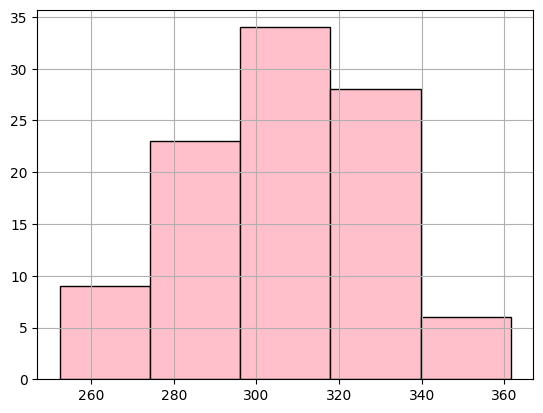

Интервал		Частота
[252.4199, 274.2573)	9
[274.2573, 296.0946)	23
[296.0946, 317.9320)	34
[317.9320, 339.7693)	28
[339.7693, 361.6067)	6


b


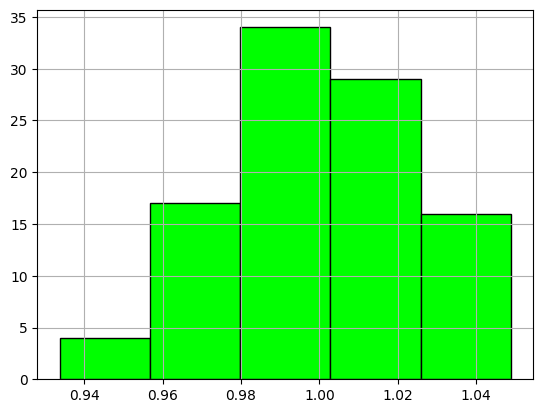

Интервал		Частота
[0.9338, 0.9568)	4
[0.9568, 0.9798)	17
[0.9798, 1.0028)	34
[1.0028, 1.0258)	29
[1.0258, 1.0488)	16


In [114]:
print("a")
show_graf_table(a_list, bins, "pink")

print("\n\nb")
show_graf_table(b_list, bins, "lime")
